In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import Imputer, scale
warnings.filterwarnings("ignore")
#from imblearn.under_sampling import InstanceHardnessThreshold

In [2]:
df_imdb = pd.read_csv("imdb_edited.txt",sep="\t")
df_imdb['rating'][19]=1
df_imdb['rating'][196]=0
df_imdb['rating'][844]=1
#print(df_imdb[df_imdb['rating'].isnull()])
df_imdb['rating']=[int(i) for i in df_imdb['rating']]
df_imdb

,tweet,rating
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [3]:
for row,col in df_imdb['rating'].iteritems():
    print(row,col)

0 0
1 0
2 0
3 0
4 1
5 0
6 0
7 1
8 0
9 1
10 1
11 1
12 1
13 1
14 1
15 0
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 0
26 0
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 0
35 1
36 1
37 1
38 1
39 0
40 0
41 0
42 0
43 0
44 0
45 0
46 0
47 0
48 0
49 1
50 1
51 1
52 1
53 0
54 0
55 0
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 0
65 0
66 0
67 0
68 0
69 0
70 0
71 0
72 0
73 1
74 0
75 1
76 1
77 1
78 1
79 1
80 0
81 1
82 1
83 1
84 1
85 1
86 1
87 1
88 1
89 1
90 1
91 0
92 0
93 0
94 0
95 1
96 1
97 1
98 1
99 1
100 1
101 0
102 0
103 0
104 0
105 0
106 1
107 0
108 0
109 1
110 1
111 0
112 0
113 0
114 0
115 0
116 0
117 0
118 1
119 1
120 1
121 1
122 1
123 1
124 1
125 1
126 1
127 0
128 1
129 0
130 0
131 0
132 0
133 0
134 0
135 0
136 0
137 0
138 0
139 0
140 0
141 0
142 0
143 0
144 1
145 0
146 0
147 0
148 0
149 0
150 0
151 1
152 0
153 0
154 0
155 0
156 0
157 0
158 0
159 0
160 0
161 0
162 0
163 0
164 0
165 0
166 0
167 0
168 1
169 0
170 0
171 0
172 0
173 0
174 0
175 0
176 0
177 0
178 0
179 0
180 0
181 0
182 0
183 0
184 0


In [4]:
df_imdb['rating']

0      0
1      0
2      0
3      0
4      1
5      0
6      0
7      1
8      0
9      1
10     1
11     1
12     1
13     1
14     1
15     0
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     0
26     0
27     1
28     1
29     1
      ..
970    1
971    1
972    0
973    0
974    0
975    1
976    1
977    0
978    1
979    1
980    1
981    1
982    1
983    1
984    1
985    1
986    1
987    1
988    1
989    1
990    1
991    1
992    1
993    1
994    0
995    0
996    0
997    0
998    0
999    0
Name: rating, Length: 1000, dtype: int64

In [5]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import numpy

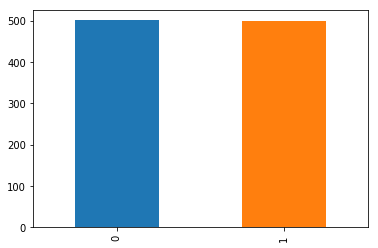

In [6]:
df_imdb['rating'].value_counts().plot(kind='bar')

In [7]:
from wordcloud import WordCloud,STOPWORDS

In [8]:
df2=df_imdb[df_imdb['rating']==0]
words = ' '.join(df2['tweet'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [9]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

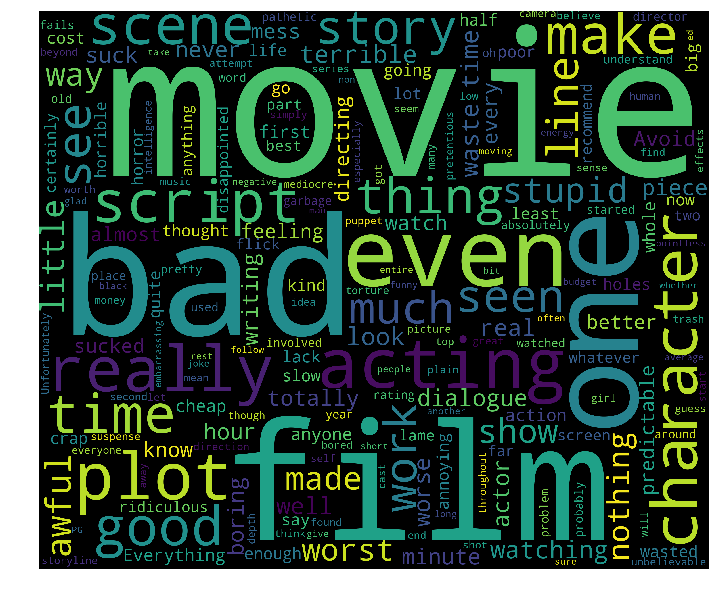

In [10]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [11]:
import re
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')

In [12]:
def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)#replace sngle words in begining of sentence with " "
    words = letters_only.lower().split()#change all to lower case & split
    stops = set(stopwords.words("english"))#removing stopwords
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [13]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [14]:
df_imdb['clean_tweet'] = df_imdb['tweet'].apply(lambda x: tweet_to_words(x))
df_imdb['Tweet_length'] = df_imdb['tweet'].apply(lambda x: clean_tweet_length(x))
#print(df_imdb['Tweet_length'])
k=df_imdb['Tweet_length']
for row,col in k.iteritems():
    print (row,col)

0 8
1 8
2 19
3 4
4 10
5 10
6 3
7 9
8 2
9 6
10 3
11 8
12 4
13 1
14 8
15 8
16 13
17 14
18 7
19 7
20 8
21 9
22 6
23 7
24 14
25 5
26 5
27 6
28 3
29 2
30 7
31 3
32 4
33 4
34 3
35 5
36 2
37 4
38 2
39 3
40 18
41 3
42 21
43 1
44 4
45 14
46 3
47 15
48 6
49 7
50 9
51 17
52 6
53 11
54 3
55 7
56 5
57 2
58 4
59 7
60 4
61 3
62 5
63 5
64 2
65 9
66 6
67 5
68 4
69 14
70 4
71 9
72 11
73 3
74 5
75 7
76 16
77 7
78 4
79 7
80 17
81 4
82 6
83 5
84 8
85 3
86 1
87 6
88 2
89 11
90 3
91 2
92 1
93 2
94 5
95 7
96 9
97 5
98 11
99 18
100 2
101 11
102 6
103 4
104 2
105 1
106 7
107 6
108 6
109 4
110 15
111 4
112 13
113 4
114 3
115 6
116 6
117 12
118 4
119 2
120 4
121 10
122 4
123 4
124 1
125 1
126 4
127 9
128 9
129 7
130 15
131 7
132 5
133 2
134 5
135 8
136 7
137 10
138 6
139 12
140 8
141 9
142 12
143 4
144 8
145 10
146 9
147 4
148 4
149 9
150 2
151 9
152 1
153 2
154 1
155 1
156 6
157 5
158 3
159 5
160 2
161 9
162 1
163 6
164 11
165 9
166 20
167 14
168 9
169 8
170 11
171 10
172 5
173 3
174 3
175 2
176 10
177 3
178 2
1

In [15]:
'''y=pd.DataFrame()
z=" "
j=0
i=0
x=df_india['clean_tweet']
space=0
for row,col in x.iteritems():
    space=0
    while (space<=8):
        z=z+x[j][i]
        #print(z)
        i+=1
        if ( x[j][i]==" " ):
            space+=1
    i=0
    y.set_value(j,i,z)
    z=" "
    j+=1
y
'''

'y=pd.DataFrame()\nz=" "\nj=0\ni=0\nx=df_india[\'clean_tweet\']\nspace=0\nfor row,col in x.iteritems():\n    space=0\n    while (space<=8):\n        z=z+x[j][i]\n        #print(z)\n        i+=1\n        if ( x[j][i]==" " ):\n            space+=1\n    i=0\n    y.set_value(j,i,z)\n    z=" "\n    j+=1\ny\n'

In [16]:
#df_india["reduced"]=y

In [17]:
train, test = train_test_split(df_imdb,test_size=0.25)
#df_imdb['clean_tweet']
print ("train:",train["rating"].value_counts())
print ("test:",test["rating"].value_counts())

print (train['clean_tweet'])

train: 0    380
1    370
Name: rating, dtype: int64
test: 1    129
0    121
Name: rating, dtype: int64
878                                       poised amazing
830    see kids chance open amazing dialog far race r...
352                                             shameful
961    actors truly understand become particular char...
756    early film future goremeister lucio fulci good...
163                  think ever gone movie disliked much
872    story starts fast absolutely suspense build sl...
154                                                 plot
345                                       babie bop cute
991                                    fans genre heaven
890    consistent thread holding series together amaz...
952    presents idyllic yet serious portrayal ups dow...
916                                 excellent short film
180                               lead man charisma free
300    recommend everyone loves film movies anything ...
242    good intentions made film great fil

In [18]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
#print v.vocabulary_
test_features=v.transform(test_clean_tweet)

In [20]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn import cross_validation

In [21]:
#clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
#clf2 = KNeighborsClassifier(n_neighbors=1) 
#cv = cross_validation.KFold(train_features.shape[0], n_folds=3)
clf1 = RandomForestClassifier(n_estimators=200)
clf2 = AdaBoostClassifier() 
#print (cv)
#print (train_features)


Classifiers = [
    LogisticRegression(solver='liblinear',penalty='l1',max_iter=200),
    #LogisticRegressionCV(solver='liblinear',penalty='l1',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB(),
     BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8),
     BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)]

In [22]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
#results = []
Accuracy=[]
Model=[]
for classifier in Classifiers:
    #for traincv, testcv in cv:
        try:
            #probas = classifier.fit(train[traincv], target[traincv]).predict_proba(train[testcv])
            #results.append( Error_function )

            fit = classifier.fit(train_features,train['rating'])
            pred = fit.predict(test_features)
        except Exception:
            fit = classifier.fit(dense_features,train['rating'])
            pred = fit.predict(dense_test)
        accuracy = accuracy_score(pred,test['rating'])
        Accuracy.append(accuracy)
        Model.append(classifier.__class__.__name__)
        print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))
    
# "Error_function" can be replaced by the error function of your analysis


Accuracy of LogisticRegressionis 0.74
Accuracy of KNeighborsClassifieris 0.616
Accuracy of SVCis 0.484
Accuracy of DecisionTreeClassifieris 0.676
Accuracy of RandomForestClassifieris 0.76
Accuracy of AdaBoostClassifieris 0.708
Accuracy of GaussianNBis 0.724
Accuracy of BaggingClassifieris 0.72
Accuracy of BaggingClassifieris 0.684


In [23]:
'''from sklearn.model_selection import GridSearchCV
svc = SVC()
c = (10**np.array(range(1,2)))/100
params = {"kernel":["rbf", "poly"], 'C':c}
clf = GridSearchCV(svc, params, cv=None).fit(dense_features, train['rating'])
pred = fit.predict(dense_test)
accuracy = accuracy_score(pred,test['rating'])
accuracy

#X_train, y_train, X_validation, y_validation, X_test, y_test
'''

'from sklearn.model_selection import GridSearchCV\nsvc = SVC()\nc = (10**np.array(range(1,2)))/100\nparams = {"kernel":["rbf", "poly"], \'C\':c}\nclf = GridSearchCV(svc, params, cv=None).fit(dense_features, train[\'rating\'])\npred = fit.predict(dense_test)\naccuracy = accuracy_score(pred,test[\'rating\'])\naccuracy\n\n#X_train, y_train, X_validation, y_validation, X_test, y_test\n'

In [24]:
dense_features.shape

(750, 2413)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

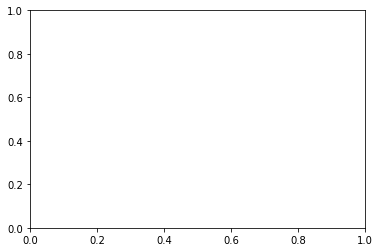

In [25]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')